# k-means clustering on a randomly generated dataset

This notebook is **partially** based on the Cousera course "Applied Data Science Capstone (week 3)."

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

Here, you can set the total number of points "n_samples" and the standard deviation of the clusters "std."

In [2]:
# The number of samples
n_samples=10000

# A recomended value is between 0 and 1 
std=1 

#Number of times the k-means algorithm will be run with different centroid seeds
num_k=20  

The centers of 4 clusters are determined rondomly within specific squares.

In [3]:
x_center1=random.uniform(0,4)
y_center1=random.uniform(0,4)
x_center2=random.uniform(6,10)
y_center2=random.uniform(0,4)
x_center3=random.uniform(0,4)
y_center3=random.uniform(6,10)
x_center4=random.uniform(6,10)
y_center4=random.uniform(6,10)

num_cluster=len([[x_center1,y_center1],[x_center2,y_center2],[x_center3,y_center3],[x_center4,y_center4]])
print('The number of clusters:',num_cluster)

The number of clusters: 4


In [4]:
X,Y = make_blobs(n_samples, centers=[[x_center1,y_center1],[x_center2,y_center2],[x_center3,y_center3],[x_center4,y_center4]],cluster_std=std)

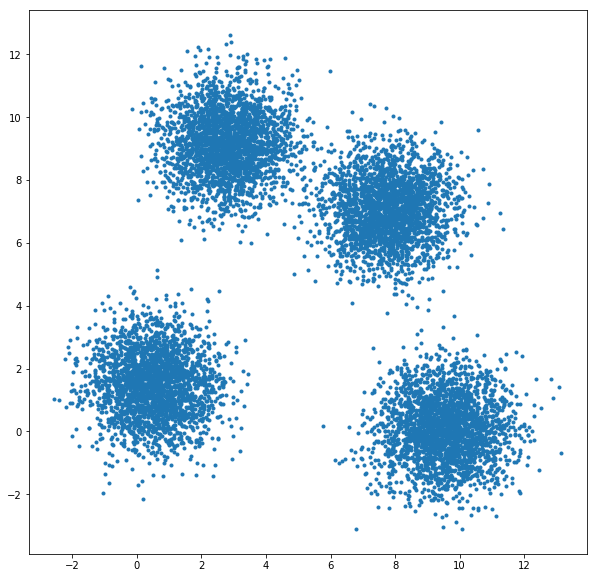

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [6]:
k_means = KMeans(init="k-means++", n_clusters=num_cluster, n_init=num_k)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
k_means_labels = k_means.labels_

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
print('Determined centers:\n', k_means_cluster_centers)

Determined centers:
 [[9.52833912 0.06513378]
 [2.8103618  9.178543  ]
 [0.50676468 1.50064516]
 [7.78890424 7.05826101]]


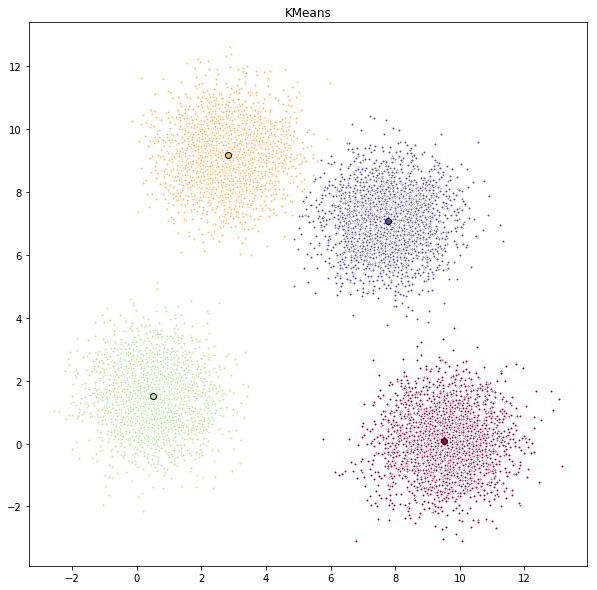

In [9]:
fig = plt.figure(figsize=(10, 10))

num_labels=len(set(k_means_labels))
colors = plt.cm.Spectral(np.linspace(0, 1,num_labels))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[x_center1,y_center1],[x_center2,y_center2],[x_center3,y_center3],[x_center4,y_center4]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
        
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
        
# title of the plot
ax.set_title('KMeans')

# show the plot
plt.show()